In [ ]:
# when using google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
import os
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import networkx as nx
import pickle
import regex as re
from tqdm.notebook import tqdm

# import nltk
# nltk.download('punkt')

import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [ ]:
path = "/content/gdrive/MyDrive/Kelompok E Anamedsos/query-vaksin-from-id/merge_data/"

In [ ]:
path_jilham = "/content/gdrive/MyDrive/Kelompok E Anamedsos/CODE/Pertanyaan 5/"

In [ ]:
merge_tweet_labeled = pd.read_json(path+"merge_tweet_labeled.json")

In [ ]:
data = merge_tweet_labeled[['user_id', 'user_name', 'user_friends_count', 'stance']]
data.drop_duplicates(subset='user_id', inplace=True)
data.set_index('user_id', inplace=True)

In [ ]:
data.head()

,user_name,user_friends_count,stance
user_id,,,
297263457,Juhadi Kulon Progo,96,PRO
918491880492482561,anin,134,ABSTAIN
4688126126,Ai Zu Din,163,ABSTAIN
1517856303905148930,bia,77,ABSTAIN
392588059,Hasbi,333,PRO


In [ ]:
import pickle

In [ ]:
with open(path+'undirected_graph_all.graph', 'rb') as handle:
    undirected_graph_all = pickle.load(handle)

In [ ]:
list_node_data = []

for node in undirected_graph_all.nodes:
  if data.loc[node, 'stance'] != 'ABSTAIN':
    list_node_data.append([node, data.loc[node, 'stance']])

In [ ]:
data_user_df = pd.DataFrame(list_node_data,
                              columns=['user', 'stance',])

In [ ]:
data_user_df.to_csv(path_jilham+"data_user_df.csv", index=False)

In [ ]:
data_user_df = pd.read_csv(path_jilham+"data_user_df.csv")

In [ ]:
list_edge_data = []

for source, target in undirected_graph_all.edges:
  if data.loc[source, 'stance'] != 'ABSTAIN' and data.loc[target, 'stance'] != 'ABSTAIN':
    list_edge_data.append([source,
                           target,])

In [ ]:
data_friend_df = pd.DataFrame(list_edge_data,
                              columns=['source', 'target',])

In [ ]:
data_friend_df.head()

,source,target
0,975389335775199232,1240137086331748352
1,975389335775199232,1262955628424761344
2,975389335775199232,1180541549643304960
3,975389335775199232,247277409
4,975389335775199232,1189386665204125698


In [ ]:
data_friend_df.to_csv(path_jilham+"data_friend_df.csv", index=False)

In [ ]:
data_friend_df = pd.read_csv(path_jilham+"data_friend_df.csv")

# Network Construction

In [ ]:
# create empte graph
G = nx.Graph()

In [ ]:
# code for inserting node and its attribute (stance)
for _, user in data_user_df.iterrows():
  G.add_node(user['user'], stance=user['stance'])

In [ ]:
# code for inserting edge (friendship)
for _, friend in data_friend_df.iterrows():
  G.add_edge(friend['source'], friend['target'])

In [ ]:
# set color for each node
list_color = []
for node in G.nodes:
  if G.nodes[node]['stance'] == 'PRO':
    list_color.append('blue')
  elif G.nodes[node]['stance'] == 'KONTRA':
    list_color.append('red')

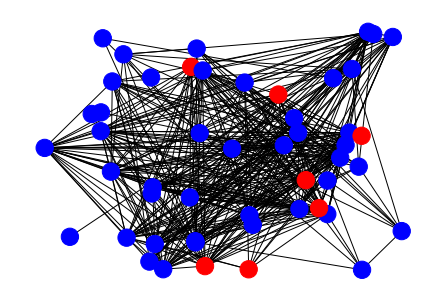

In [ ]:
nx.draw_random(G, node_color=list_color)
plt.show()

In [ ]:
import pickle

In [14]:
with open(path_jilham+'friendship_graph.pickle', 'wb') as handle:
    pickle.dump(G, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Homophily Test

In [ ]:
node_pro = 0
node_kontra = 0

for node in list(G.nodes):
  if G.nodes[node]['stance'] == 'PRO':
    node_pro += 1
  elif G.nodes[node]['stance'] == 'KONTRA':
    node_kontra += 1
  else:
    continue

In [ ]:
cross_edge_count = 0
for node, target in list(G.edges):
  if G.nodes[node]['stance'] != G.nodes[target]['stance']:
    cross_edge_count += 1

In [ ]:
# homophily test
threshold = 2 * (node_pro / len(G.nodes)) * (node_kontra / len(G.nodes))
cross_edge_prob = cross_edge_count / len(G.edges)

if cross_edge_prob < threshold:
  print("Enough evidence to prove that there is a homophily in a graph")
else:
  print("Not enough evidence")

Not enough evidence


In [ ]:
cross_edge_prob, threshold

(0.25806451612903225, 0.24080000000000001)